In [1]:
from evaluations import *
acc =1e-2
boundary = 'dirichlet'
coarse_grid_resolution = 10
p = helmholtz(boundary = boundary)


Loading pyMOR version 0.4.2-116-gadb475af


In [2]:
dats = []
for k in range(1,10):
    resolution  = int(np.ceil(float(k*1.5+50)/coarse_grid_resolution)*coarse_grid_resolution)
    cglob = -1j*k
    cloc0 = 0
    cloc1 = 0.02*(5-1j)
    cloc2 = 0.0016*(8-1j)
    cloc = cloc0+ cloc1*k+cloc2*k**2
    mus = {'k': k, 'c_glob': cglob, 'c_loc': cloc}
    gq, lq = localize_problem(p, coarse_grid_resolution, resolution, mus = mus, calT = True, calQ = True)
    calculate_continuity_constant(gq, lq)
    calculate_inf_sup_constant2(gq, lq)
    calculate_lambda_min(gq, lq)
    calculate_csis(gq,lq)
    calculate_Psi_norm(gq,lq)
    d = gq["d"]
    u = d.solve(mus)
    bases = create_bases(gq, lq, num_testvecs=20, transfer = 'robin', target_accuracy = acc, calC = False)
    ru = reconstruct_solution(gq,lq,bases)

    k_prod = gq["k_product"]
    norm = induced_norm(k_prod)
    ls = norm(u-ru)
    print ls
    sum = NumpyVectorArray(u.data*0)
    for space in gq["spaces"]:
        ldict = lq[space]
        basis = bases[space]
        M = ldict["range_product"]._matrix
        S = ldict["source_product"]._matrix
        M_sparse = scipy.sparse.csr_matrix(M)
        T = ldict["transfer_matrix_robin"]
        B = basis._array.T
        range_space = ldict["range_space"]
        localizer = gq["localizer"]
        pou = gq["pou"]
        u_loc = pou[range_space](localizer.localize_vector_array(u, range_space))
        u_s = ldict["local_solution_robin"]
        u_dif = u_loc-u_s
        term = u_dif.data.T - B.dot(B.conj().T).dot(M_sparse.dot(u_dif.data.T))
        u_i = localizer.globalize_vector_array(NumpyVectorArray(term.T), range_space)
        sum += u_i
    rs1 = gq["continuity_constant"]/gq["inf_sup_constant"]* norm(sum)
    print rs1
    dats.append(rs1/norm(u))

localizing problem


/usr/lib/python2.7/dist-packages/scipy/sparse/compressed.py:774: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


calculated_continuity_constant:  0.999983529162
calculated_inf_sup_constant:  0.903581779435
calculated all lambdas


/home/root_dennis/pymor_MA/src/pymor/operators/constructions.py:1002: RuntimeWarning: invalid value encountered in double_scalars
  if (np.linalg.norm(norm_squared.imag)/np.linalg.norm(norm_squared) > 1e-11):
/usr/lib/python2.7/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:737: ComplexWarning: Casting complex values to real discards the imaginary part
  self.workd[yslice] = self.OP(self.workd[xslice])
/usr/lib/python2.7/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:746: ComplexWarning: Casting complex values to real discards the imaginary part
  self.workd[yslice] = self.B(self.workd[xslice])
/usr/lib/python2.7/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:741: ComplexWarning: Casting complex values to real discards the imaginary part
  self.workd[yslice] = self.OP(self.workd[xslice])


calculated csis
calculated all Psi_norms


mybmat.py:20: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(blocks) != 2:


[  5.41051298e-08]
[  8.77003254e-08]
localizing problem
calculated_continuity_constant:  0.999961432982
calculated_inf_sup_constant:  0.663058122179
calculated all lambdas
calculated csis
calculated all Psi_norms
[  3.55025757e-08]
[  7.51678829e-08]
localizing problem
calculated_continuity_constant:  0.999924975793
calculated_inf_sup_constant:  0.373759856171
calculated all lambdas
calculated csis
calculated all Psi_norms
[  2.04173941e-08]
[  7.93261762e-08]
localizing problem
calculated_continuity_constant:  0.999870727946
calculated_inf_sup_constant:  0.104718987174
calculated all lambdas
calculated csis
calculated all Psi_norms
[  1.08334204e-08]
[  1.45483106e-07]
localizing problem
calculated_continuity_constant:  0.99980297506
calculated_inf_sup_constant:  0.11749405492
calculated all lambdas
calculated csis
calculated all Psi_norms
[  1.38572205e-08]
[  1.74482143e-07]
localizing problem
calculated_continuity_constant:  0.999717500438
calculated_inf_sup_constant:  0.156677500

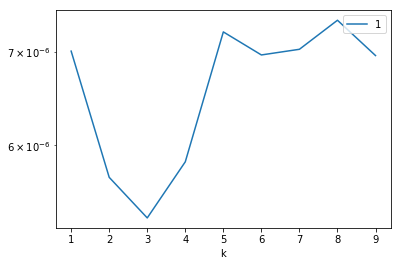

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure()
plt.semilogy(range(1,10), dats, label = "1")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.show()

In [4]:
np.array(dats).T[0]

array([  7.00771155e-06,   5.69308003e-06,   5.32506502e-06,
         5.84033008e-06,   7.23300189e-06,   6.96378547e-06,
         7.02901186e-06,   7.37327592e-06,   6.95685677e-06])

In [35]:
d = gq["d"]
u = d.solve(mus)
bases = create_bases(gq, lq, num_testvecs=20, transfer = 'robin', target_accuracy = acc, calC = False)
ru = reconstruct_solution(gq,lq,bases)

k_prod = gq["k_product"]
norm = induced_norm(k_prod)
ls = norm(u-ru)
print ls

[  1.81873062e-08]


In [36]:
sum = NumpyVectorArray(u.data*0)
for space in gq["spaces"]:
	ldict = lq[space]
	basis = bases[space]
	M = ldict["range_product"]._matrix
	S = ldict["source_product"]._matrix
	M_sparse = scipy.sparse.csr_matrix(M)
	T = ldict["transfer_matrix_robin"]
	B = basis._array.T
	range_space = ldict["range_space"]
	localizer = gq["localizer"]
	pou = gq["pou"]
	u_loc = pou[range_space](localizer.localize_vector_array(u, range_space))
	u_s = ldict["local_solution_robin"]
	u_dif = u_loc-u_s
	term = u_dif.data.T - B.dot(B.conj().T).dot(M_sparse.dot(u_dif.data.T))
	u_i = localizer.globalize_vector_array(NumpyVectorArray(term.T), range_space)
	sum += u_i
rs1 = gq["continuity_constant"]/gq["inf_sup_constant"]* norm(sum)
print rs1
print rs1/ls

[  2.58244026e-07]
[ 14.19913554]


In [37]:
sum = 0
for space in gq["spaces"]:
	ldict = lq[space]
	basis = bases[space]
	M = ldict["range_product"]._matrix
	S = ldict["source_product"]._matrix
	M_sparse = scipy.sparse.csr_matrix(M)
	T = ldict["transfer_matrix_robin"]
	B = basis._array.T
	range_space = ldict["range_space"]
	localizer = gq["localizer"]
	pou = gq["pou"]
	u_loc = pou[range_space](localizer.localize_vector_array(u, range_space))
	u_s = ldict["local_solution_robin"]
	u_dif = u_loc-u_s
	term = u_dif.data.T - B.dot(B.conj().T).dot(M_sparse.dot(u_dif.data.T))
	u_i = NumpyVectorArray(term.T)
	local_norm = induced_norm(ldict["range_product"])
	sum += local_norm(u_i)
rs2 = gq["continuity_constant"]/gq["inf_sup_constant"]* sum
print rs2
print rs2/rs1

[  1.85447686e-06]
[ 7.18110266]


In [38]:
sum = 0
for space in gq["spaces"]:
	ldict = lq[space]
	basis = bases[space]
	M = ldict["range_product"]._matrix
	S = ldict["source_product"]._matrix
	M_sparse = scipy.sparse.csr_matrix(M)
	T = ldict["transfer_matrix_robin"]
	B = basis._array.T
	range_space = ldict["range_space"]
	omega_star_space = ldict["omega_star_space"]
	localizer = gq["localizer"]
	pou = gq["pou"]
	u_loc = localizer.localize_vector_array(u, omega_star_space)
	u_s = ldict["local_sol2"]
	u_dif = u_loc-u_s
	u_i = u_dif
	T1 = T - B.dot(B.conj().T).dot(M_sparse.dot(T))
	maxval = operator_svd2(T1, S, M_sparse)[0][0]
	local_norm = induced_norm(ldict["omega_star_product"])
	sum += maxval*ldict["Psi_norm"]*local_norm(u_i)
rs3 = gq["continuity_constant"]/gq["inf_sup_constant"]* sum
print rs3
print rs3/rs2

[  6.68626179e-06]
[ 3.60547059]


In [39]:
sum = 0
for space in gq["spaces"]:
	ldict = lq[space]
	basis = bases[space]
	M = ldict["range_product"]._matrix
	S = ldict["source_product"]._matrix
	M_sparse = scipy.sparse.csr_matrix(M)
	T = ldict["transfer_matrix_robin"]
	B = basis._array.T
	range_space = ldict["range_space"]
	omega_star_space = ldict["omega_star_space"]
	localizer = gq["localizer"]
	pou = gq["pou"]
	u_loc = localizer.localize_vector_array(u, omega_star_space)
	T1 = T - B.dot(B.conj().T).dot(M_sparse.dot(T))
	maxval = operator_svd2(T1, S, M_sparse)[0][0]
	local_norm = induced_norm(ldict["omega_star_product"])
	sum += maxval*ldict["Psi_norm"]*local_norm(u_loc)*ldict["csi"]
rs4 = gq["continuity_constant"]/gq["inf_sup_constant"]* sum
print rs4
print rs4/rs3

[  8.34020713e-06]
[ 1.24736473]


In [40]:
sum1 = 0
sum2 = 0
for space in gq["spaces"]:
	ldict = lq[space]
	basis = bases[space]
	M = ldict["range_product"]._matrix
	S = ldict["source_product"]._matrix
	M_sparse = scipy.sparse.csr_matrix(M)
	T = ldict["transfer_matrix_robin"]
	B = basis._array.T
	range_space = ldict["range_space"]
	omega_star_space = ldict["omega_star_space"]
	localizer = gq["localizer"]
	pou = gq["pou"]
	u_loc = localizer.localize_vector_array(u, omega_star_space)
	T1 = T - B.dot(B.conj().T).dot(M_sparse.dot(T))
	maxval = operator_svd2(T1, S, M_sparse)[0][0]
	local_norm = induced_norm(ldict["omega_star_product"])
	sum1 += maxval**2*ldict["Psi_norm"]**2*ldict["csi"]**2
	sum2 += local_norm(u_loc)**2
rs5 = gq["continuity_constant"]/gq["inf_sup_constant"]* np.sqrt(sum1) * np.sqrt(sum2)
print rs5
print rs5/rs4

[  9.28293027e-06]
[ 1.11303354]


In [41]:
sum = 0
for space in gq["spaces"]:
	ldict = lq[space]
	basis = bases[space]
	M = ldict["range_product"]._matrix
	S = ldict["source_product"]._matrix
	M_sparse = scipy.sparse.csr_matrix(M)
	T = ldict["transfer_matrix_robin"]
	B = basis._array.T
	range_space = ldict["range_space"]
	omega_star_space = ldict["omega_star_space"]
	localizer = gq["localizer"]
	pou = gq["pou"]
	u_loc = localizer.localize_vector_array(u, omega_star_space)
	T1 = T - B.dot(B.conj().T).dot(M_sparse.dot(T))
	maxval = operator_svd2(T1, S, M_sparse)[0][0]
	sum += maxval**2*ldict["Psi_norm"]**2*ldict["csi"]**2
rs6 = gq["continuity_constant"]/gq["inf_sup_constant"]* np.sqrt(sum) *4* norm(u)
print rs6
print rs6/rs5

[  1.10224111e-05]
[ 1.18738488]


In [42]:
print np.log10(rs6/ls)

[ 2.78250823]


In [43]:
print np.log10(acc/ls)

[ 5.74023162]


In [44]:
print np.log10(acc/rs6)

[ 2.9577234]


In [45]:
print ls/norm(u)

[  5.66591192e-07]


In [46]:
print acc/(rs6/norm(u))

[ 29.12205085]


In [47]:
1.2*1.09*1.23*3.8*7.56*90.29

4173.0914359008

In [48]:
print rs6/ls

[ 606.04967834]


In [58]:
acc=1e-2
boundary = 'robin'
k=6.
cloc0 = 0
cloc1 = 0.02*(5-1j)
cloc2 = 0.0016*(8-1j)
p = helmholtz(boundary = boundary)
cglob = -1j*k
mus = {'k': k, 'c_glob': cglob, 'c_loc': cloc}
resolution  = int(np.ceil(float(k*1.5+50)/coarse_grid_resolution)*coarse_grid_resolution)
gq, lq = localize_problem(p, coarse_grid_resolution, resolution, mus = mus, calT = True, calQ = True)
calculate_continuity_constant(gq, lq)
calculate_inf_sup_constant2(gq, lq)	
calculate_lambda_min(gq, lq)
calculate_csis(gq,lq)	
calculate_Psi_norm(gq,lq)
d = gq["d"]
u = d.solve(mus)
bases = create_bases(gq, lq, num_testvecs=20, transfer = 'robin', target_accuracy = acc, calC = False)
rssum2 = 0
for space in gq["spaces"]:
    ldict = lq[space]
    basis = bases[space]
    M = ldict["range_product"]._matrix
    S = ldict["source_product"]._matrix
    M_sparse = scipy.sparse.csr_matrix(M)
    T = ldict["transfer_matrix_robin"]
    B = basis._array.T
    T1 = T - B.dot(B.conj().T).dot(M_sparse.dot(T))
    maxval = operator_svd2(T1, S, M_sparse)[0][0]
    rssum2 += maxval**2*ldict["csi"]**2*ldict["Psi_norm"]**2
ru = reconstruct_solution(gq,lq,bases)
print gq["full_norm"](u-ru)[0]/gq["full_norm"](u)[0]
print (gq["continuity_constant"]/gq["inf_sup_constant"])*4*np.sqrt(rssum2)

localizing problem
calculated_continuity_constant:  1.79186818672
calculated_inf_sup_constant:  0.227325649277
calculated all lambdas
calculated csis
calculated all Psi_norms
6.31383629446e-07
0.000345952747938


In [69]:
import psutil
print(psutil.virtual_memory())

ImportError: No module named psutil

In [2]:
space = gq["spaces"][14]
l = gq["localizer"]
ldict = lq[space]
H1om = ldict["omega_star_product"]._matrix
MS = ldict["source_product"]._matrix

Q = ldict["solution_matrix_robin"]
M = Q.T.conj().dot(H1om.dot(Q))

In [16]:
np.linalg.inv(M).dot(MS.todense()).shape

(73, 73)

In [28]:
sp.eigs(MS, M=M)[0][0].real

0.019102821375077156

In [22]:
eigvals = np.linalg.eigvals(np.linalg.inv(M).dot(MS.todense()))
eigvals[::-1].sort()
eigvals[0].real

0.019102821375441906

In [35]:
MS

<73x73 sparse matrix of type '<type 'numpy.float64'>'
	with 217 stored elements in Compressed Sparse Column format>

In [6]:
dats1 = []
dats2 = []
dats3 = []
for k in range(1,10):
    resolution  = int(np.ceil(float(k*1.5+50)/coarse_grid_resolution)*coarse_grid_resolution)
    cglob = -1j*k
    cloc0 = 0
    cloc1 = 0.02*(5-1j)
    cloc2 = 0.0016*(8-1j)
    cloc = cloc0+ cloc1*k+cloc2*k**2
    mus = {'k': k, 'c_glob': cglob, 'c_loc': cloc}
    gq, lq = localize_problem(p, coarse_grid_resolution, resolution, mus = mus, calT = True, calQ = True)
    calculate_continuity_constant(gq, lq)
    calculate_inf_sup_constant2(gq, lq)
    calculate_lambda_min(gq, lq)
    calculate_csis(gq,lq)
    calculate_Psi_norm(gq,lq)
    d = gq["d"]
    u = d.solve(mus)
    bases = create_bases(gq, lq, num_testvecs=20, transfer = 'robin', target_accuracy = acc, calC = False)
    ru = reconstruct_solution(gq,lq,bases)

    k_prod = gq["k_product"]
    norm = induced_norm(k_prod)
    ls = norm(u-ru)
    print ls
    u_c = NumpyVectorArray(u.data*0)
    for space in gq["spaces"]:
        ldict = lq[space]
        basis = bases[space]
        M = ldict["range_product"]._matrix
        S = ldict["source_product"]._matrix
        M_sparse = scipy.sparse.csr_matrix(M)
        T = ldict["transfer_matrix_robin"]
        B = basis._array.T
        range_space = ldict["range_space"]
        localizer = gq["localizer"]
        pou = gq["pou"]
        u_loc = pou[range_space](localizer.localize_vector_array(u, range_space))
        u_s = ldict["local_solution_robin"]
        u_dif = u_loc-u_s
        term = B.dot(B.conj().T).dot(M_sparse.dot(u_dif.data.T))+u_s.data.T
        u_i = localizer.globalize_vector_array(NumpyVectorArray(term.T), range_space)
        u_c += u_i
    rs1 = norm(u-u_c)
    rs2 = norm(u_c-ru)
    us = norm(u)
    print rs1
    print rs2
    dats1.append(rs1)
    dats2.append(rs2)
    dats3.append(us)

localizing problem
calculated_continuity_constant:  0.999983562931
calculated_inf_sup_constant:  0.903581779435
calculated all lambdas
calculated csis
calculated all Psi_norms
[  4.14761570e-08]
[  6.25668535e-08]
[  4.68437240e-08]
localizing problem
calculated_continuity_constant:  0.999964703696
calculated_inf_sup_constant:  0.663058122179
calculated all lambdas
calculated csis
calculated all Psi_norms
[  3.34107865e-08]
[  4.98841567e-08]
[  3.70423877e-08]
localizing problem
calculated_continuity_constant:  0.999925259238
calculated_inf_sup_constant:  0.373759856171
calculated all lambdas
calculated csis
calculated all Psi_norms
[  2.64717378e-08]
[  3.66419123e-08]
[  2.53350789e-08]
localizing problem
calculated_continuity_constant:  0.99987130712
calculated_inf_sup_constant:  0.104718987174
calculated all lambdas
calculated csis
calculated all Psi_norms
[  9.55629319e-09]
[  1.42528707e-08]
[  1.05747270e-08]
localizing problem
calculated_continuity_constant:  0.99980225774
cal

In [13]:
k=50.
resolution  = int(np.ceil(float(k*1.5+50)/coarse_grid_resolution)*coarse_grid_resolution)
cglob = -1j*k
cloc0 = 0
cloc1 = 0.02*(5-1j)
cloc2 = 0.0016*(8-1j)
cloc = cloc0+ cloc1*k+cloc2*k**2
mus = {'k': k, 'c_glob': cglob, 'c_loc': cloc}
gq, lq = localize_problem(p, coarse_grid_resolution, resolution, mus = mus, calT = True, calQ = True)
calculate_continuity_constant(gq, lq)
calculate_inf_sup_constant2(gq, lq)
calculate_lambda_min(gq, lq)
calculate_csis(gq,lq)
calculate_Psi_norm(gq,lq)
d = gq["d"]
u = d.solve(mus)
bases = create_bases(gq, lq, num_testvecs=20, transfer = 'robin', target_accuracy = acc, calC = False)
ru = reconstruct_solution(gq,lq,bases)

k_prod = gq["k_product"]
norm = induced_norm(k_prod)
ls = norm(u-ru)
print ls
u_c = NumpyVectorArray(u.data*0)
for space in gq["spaces"]:
    ldict = lq[space]
    basis = bases[space]
    M = ldict["range_product"]._matrix
    S = ldict["source_product"]._matrix
    M_sparse = scipy.sparse.csr_matrix(M)
    T = ldict["transfer_matrix_robin"]
    B = basis._array.T
    range_space = ldict["range_space"]
    localizer = gq["localizer"]
    pou = gq["pou"]
    u_loc = pou[range_space](localizer.localize_vector_array(u, range_space))
    u_s = ldict["local_solution_robin"]
    u_dif = u_loc-u_s
    term = B.dot(B.conj().T).dot(M_sparse.dot(u_dif.data.T))+u_s.data.T
    u_i = localizer.globalize_vector_array(NumpyVectorArray(term.T), range_space)
    u_c += u_i
rs1 = norm(u-u_c)
rs2 = norm(u_c-ru)


localizing problem
calculated_continuity_constant:  0.995893717787
calculated_inf_sup_constant:  0.00305818914726
calculated all lambdas
calculated csis
calculated all Psi_norms
[  5.81959933e-10]


In [14]:
d.visualize((u,ru,u_c, u-u_c,u_c-ru), separate_colorbars = True)

/home/root_dennis/pymor_MA/src/pymor/gui/qt.py:282: ComplexWarning: Casting complex values to real discards the imaginary part
  tuple(u.data.astype(np.float64, copy=False) for u in U)


In [15]:
norm(u-ru)

array([  5.81959933e-10])

In [16]:
norm(u-u_c)

array([  6.69614884e-10])

In [17]:
norm(u_c-ru)

array([  6.00045832e-10])